In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import numpy.polynomial.legendre as leg

# Lista funkcji i nazw
funkcje = {
    "1": lambda x: 1,
    "x": lambda x: x,
    "x^2": lambda x: x**2,
    "|x|": lambda x: np.abs(x),
    "sin(x)": lambda x: np.sin(x),
    "exp(x)": lambda x: np.exp(x),
    "1/(1+x^2)": lambda x: 1/(1+x**2),
}

# Parametry użytkownika
approx_degree = 10
x = np.linspace(-10, 10, 20)
approx_x = np.linspace(-10, 10, 1000)


In [2]:
def legendre_approx(x_points, y_points, degree): 
    # Funkcje bazowe Legendre'a
    P = [leg.Legendre.basis(i) for i in range(degree+1)]
    
    # Macierz systemu równań
    A = np.zeros((len(x_points), degree+1))
    for i, x in enumerate(x_points):
        for j in range(degree+1):
            A[i, j] = P[j](x)
    
    # Rozwiąż system metodą najmniejszych kwadratów
    coeffs, residuals, rank, s = np.linalg.lstsq(A, y_points, rcond=None)
    
    # Składanie wielomianu aproksymacyjnego
    def approx(x):
        return sum(coeffs[n] * P[n](x) for n in range(degree+1))
    
    return approx, coeffs

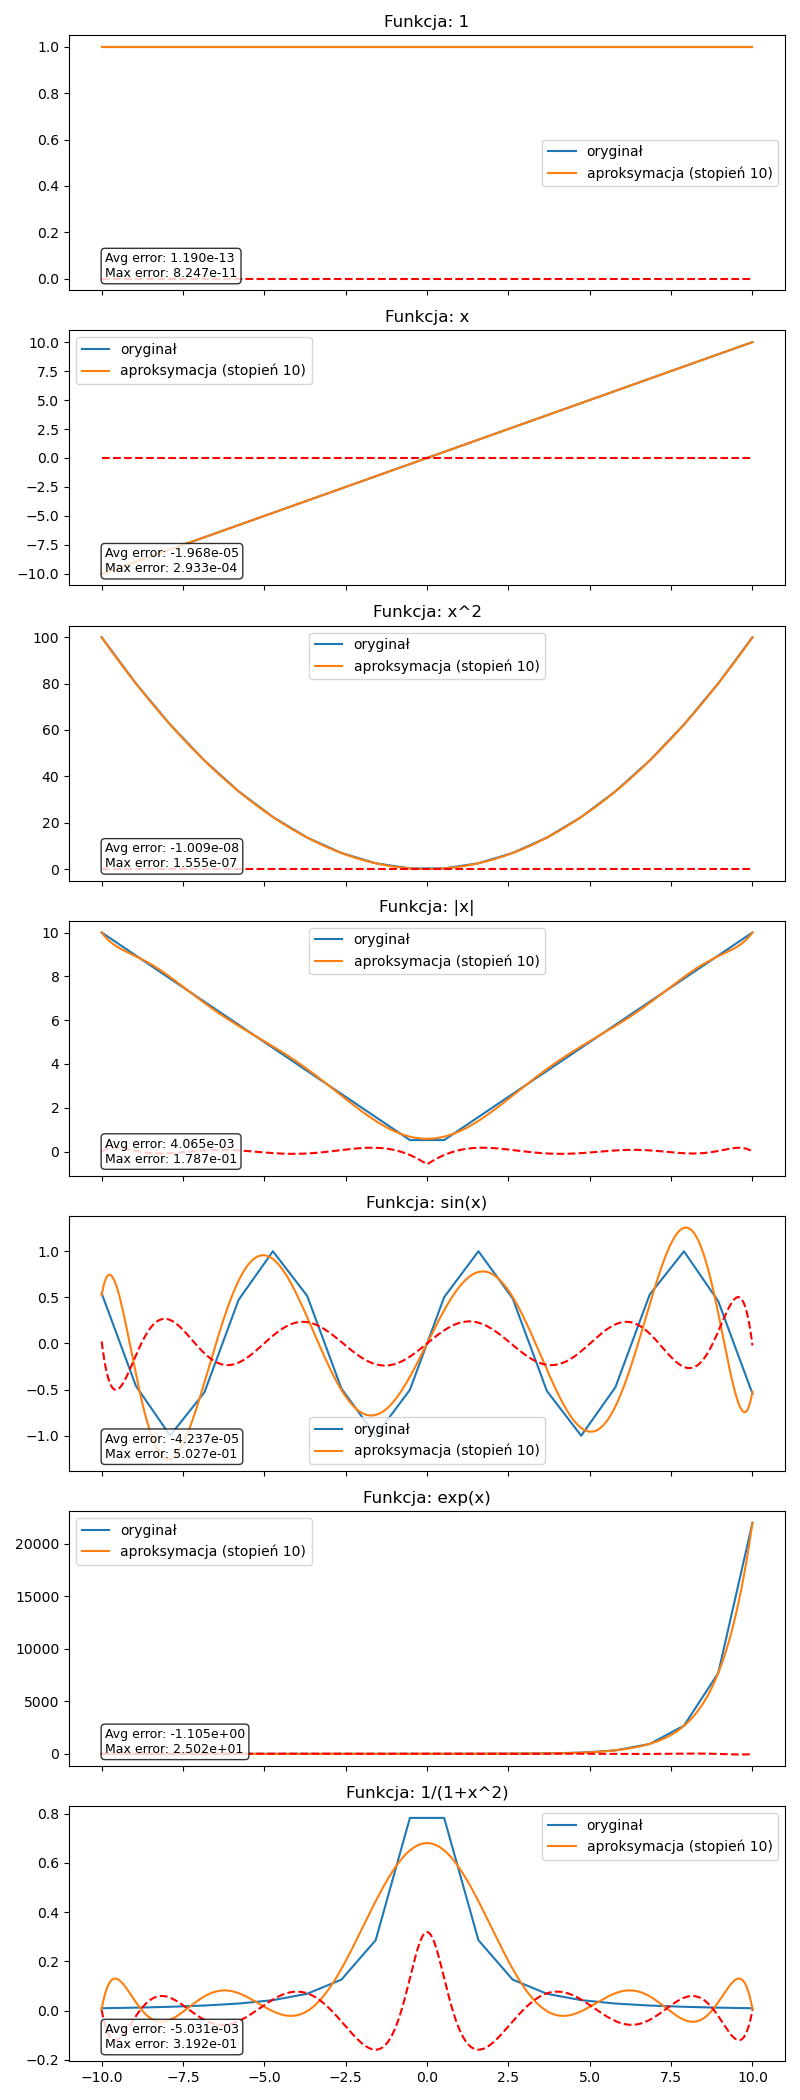

In [3]:
n_funcs = len(funkcje)
fig, axs = plt.subplots(n_funcs, 1, figsize=(8, 3*n_funcs), sharex=True)

for idx, (name, f) in enumerate(funkcje.items()):
    F = np.vectorize(f)
    approx, coeffs = legendre_approx(x, F(x), approx_degree)
    axs[idx].plot(x, F(x), label="oryginał")
    axs[idx].plot(approx_x, approx(approx_x), label=f"aproksymacja (stopień {approx_degree})")
    axs[idx].set_title(f"Funkcja: {name}")
    axs[idx].legend()
    error = f(approx_x) - approx(approx_x)
    axs[idx].plot(approx_x, error, label="Błąd aproksymacji", linestyle='--', color='red')

    error_text = f"Avg error: {np.mean(error):.3e}\nMax error: {np.max(error):.3e}"
    axs[idx].text(0.05, 0.15, error_text, transform=axs[idx].transAxes, 
                  bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8),
                  fontsize=9, verticalalignment='top')


plt.tight_layout()
plt.show()